In [1]:
from mynotebooks import *
%matplotlib inline  

exp = Box2DWorld.ExpSetup(pos_nao=(0,0),pos_obj=(0,2),obj_type="box",salientMode='minimum',name='human')
learn = RobotLearning.LearningModel(exp)
nao = exp.nao

-------------------------------------------------
Created Exp Setup  human Debug:  False
Created Learning Model bDebug False


In [2]:
exp.start()
learn.iniExp('biobj','arm')
learn.load()
salientMap = learn.SM.salientMap

Loading RobotLearning Models:  5 folder biobj strid arm
data/biobj/arm-model0.data with 1950 tuples
data/biobj/arm-model1.data with 1909 tuples
load data/biobj/salient/map0.npy
load data/biobj/salient/map1.npy
load data/biobj/salient/map2.npy
load data/biobj/salient/map3.npy
load data/biobj/salient/map4.npy
load data/biobj/salient/map5.npy
load data/biobj/salient/map6.npy
load data/biobj/salient/map7.npy
Loading Salient Point Models 8
data/biobj/salient/s6-model6.data with 5720 tuples


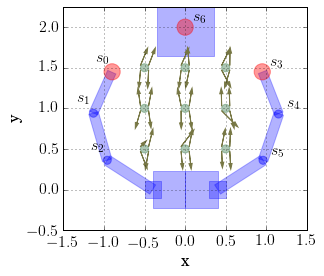

In [25]:
s0 = salientMap[0]
s3 = salientMap[3]
s6 = salientMap[6]

exp.setObjPos([0,2])
learn.myWorldLoop(2)

#nao.restPosition(online=False)
nao.gotoTargetJoints([1,-0.7,-0.7,-1,0.7,0.7])
#learn.setGrabObjGoal(ini_far=-0.1) 
learn.myWorldLoop(20)
imodel = 6
fig, ax = VectorFigUtils.makeFigure(axes=[-1.5,1.5,-0.5,2.25])

pobj = np.array(exp.getObjPos())        

Box2DWorld.plotAll(ax,centers=exp.getSalient()[:-1],specials=[0,3,imodel],label="s",xlabel="x",ylabel="y",mainfont=16)
        
for x in [-0.5,0,0.5]:
    for y in [0.5,1,1.5,]:
        p=[x,y]
        
        VectorFigUtils.drawCircle(ax,p,.05,color='#337744')  

        v = [0,.5]    
        tin = np.hstack((v,0,p))
        tout = s6.models[imodel].inverse_prediction(tin)          
        vi = 0.5*tout[:2]
        vj = 0.5*tout[2:4]
        ax.arrow(p[0]-0.05, p[1]+0.03, vi[0], vi[1], head_width=0.04, head_length=0.07, fc='#777744', ec='#777744')
        ax.arrow(p[0]+0.05, p[1]+0.03, vj[0], vj[1], head_width=0.04, head_length=0.07, fc='#777744', ec='#777744')

        v = [0,-.5]    
        tin = np.hstack((v,0,p))
        tout = s6.models[imodel].inverse_prediction(tin)          
        vi = 0.5*tout[:2]
        vj = 0.5*tout[2:4]
        ax.arrow(p[0]-0.05, p[1]-0.03, vi[0], vi[1], head_width=0.04, head_length=0.07, fc='#777744', ec='#777744')
        ax.arrow(p[0]+0.05, p[1]-0.03, vj[0], vj[1], head_width=0.04, head_length=0.07, fc='#777744', ec='#777744')

     

plt.show()
VectorFigUtils.savefig(fig,ax,'imgs/biupdown.png')

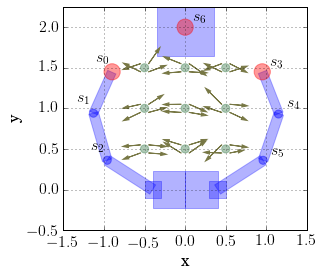

In [24]:
s0 = salientMap[0]
s3 = salientMap[3]
s6 = salientMap[6]

exp.setObjPos([0,2])
learn.myWorldLoop(2)

#nao.restPosition(online=False)
nao.gotoTargetJoints([1,-0.7,-0.7,-1,0.7,0.7])
#learn.setGrabObjGoal(ini_far=-0.1) 
learn.myWorldLoop(20)
imodel = 6
fig, ax = VectorFigUtils.makeFigure(axes=[-1.5,1.5,-0.5,2.25])

pobj = np.array(exp.getObjPos())        

Box2DWorld.plotAll(ax,centers=exp.getSalient()[:-1],specials=[0,3,imodel],label="s",xlabel="x",ylabel="y",mainfont=16)
        
for x in [-0.5,0,0.5]:
    for y in [0.5,1,1.5,]:
        p=[x,y]
        
        VectorFigUtils.drawCircle(ax,p,.05,color='#337744')  

        v = [-.5,0]    
        tin = np.hstack((v,0,p))
        tout = s6.models[imodel].inverse_prediction(tin)          
        vi = 0.5*tout[:2]
        vj = 0.5*tout[2:4]
        ax.arrow(p[0]-0.05, p[1]+0.05, vi[0], vi[1], head_width=0.04, head_length=0.07, fc='#777744', ec='#777744')
        ax.arrow(p[0]-0.05, p[1]-0.05, vj[0], vj[1], head_width=0.04, head_length=0.07, fc='#777744', ec='#777744')

        v = [.5,0]    
        tin = np.hstack((v,0,p))
        tout = s6.models[imodel].inverse_prediction(tin)          
        vi = 0.5*tout[:2]
        vj = 0.5*tout[2:4]
        ax.arrow(p[0]+0.05, p[1]+0.05, vi[0], vi[1], head_width=0.04, head_length=0.07, fc='#777744', ec='#777744')
        ax.arrow(p[0]+0.05, p[1]-0.05, vj[0], vj[1], head_width=0.04, head_length=0.07, fc='#777744', ec='#777744')

     

plt.show()
VectorFigUtils.savefig(fig,ax,'imgs/bileftright.png')

[  3.06161700e-17  -5.00000000e-01]


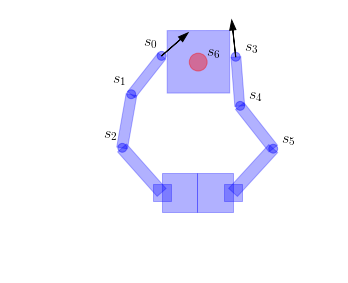

[  3.06161700e-17  -5.00000000e-01]


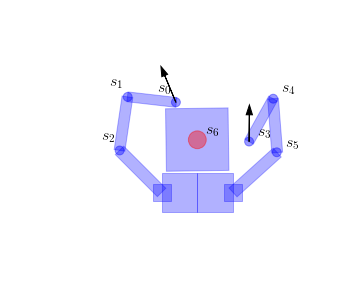

[  3.06161700e-17  -5.00000000e-01]


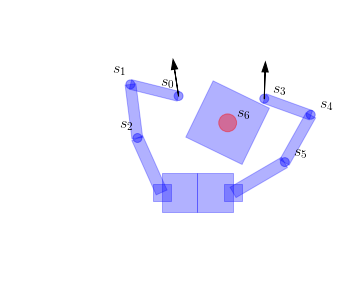

In [25]:
s0 = salientMap[0]
s3 = salientMap[3]
s6 = salientMap[6]
nao.restPosition(online=False)
nao.gotoTargetJoints([0.7,-0.5,-0.5,-0.7,0.5,0.5])
exp.setObjPos([x,y])
pobj = np.array(exp.getObjPos())
learn.setGrabObjGoal(ini_far=-0.1) 
learn.myWorldLoop(100)

for i,(x,y) in enumerate([[0,1.5],[0,0.5],[.5,1]]):        
    for imodel in [6]:

        pi = s0.getxy()
        pj = s3.getxy()
        
        fig, ax = VectorFigUtils.makeFigure(axes=[-1.5,1.5,-0.5,2])
        Box2DWorld.plotAll(ax,centers=exp.getSalient()[:-1],specials=[imodel],label="s",xlabel="x",ylabel="y",mainfont=16)

        a, da = 0, 2*np.pi / 20.0
        #while(a < 2*np.pi):
        for a in [-np.pi/2]:
            va = np.array(VectorFigUtils.vrotate([0.5,0],a))
            p = pobj + 0.8*va
            
            tin = np.hstack((-va,0,pobj))
            tout = s6.models[imodel].inverse_prediction(tin)
                
            #iv = s6.models[imodel].inverse_prediction(tout)
            #print iv

            #d = ExplautoUtils.distFwdNN(s6.models[imodel],tin)
            vi = tout[:2]
            vj = tout[2:4]
            #print s4.models[2].infer([4,5,6,7,8,9],[0,1,2,3],t)
            #if(d<=1):
            #VectorFigUtils.drawCircle(ax,p,.3*d,color='r')  
            print va
            ax.arrow(pi[0], pi[1], vi[0], vi[1], head_width=0.07, head_length=0.11, fc='k', ec='k')
            ax.arrow(pj[0], pj[1], vj[0], vj[1], head_width=0.07, head_length=0.11, fc='k', ec='k')
            a += da

        plt.axis('off')
        plt.show()
        VectorFigUtils.savefig(fig,ax,'imgs/ag%d%d.png'%(imodel,i))